In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

$$
\begin{align}
f_n(\omega) =
\left\{ 
    \begin{matrix}
    \sqrt{\frac{1}{T}}, & n=0 \\
    \sqrt{\frac{2}{T}}\cos(n \omega), & 0< n \le \frac{N+1}{2} \\
    \sqrt{\frac{2}{T}}\sin\left[ \left(n - \frac{N - 1}{2}\right)\omega\right], &  n > \frac{N+1}{2}
    \end{matrix}
\right.
\end{align}
$$

$$
\int_{-T/2}^{T/2}f_n(\omega)f_m(\omega) = \delta_{m, n}
$$

In [90]:
def basis(x, i, N, w):
    if i == 0:
        return np.sqrt(w/(2*np.pi))
    elif i <= (N-1)/2:
        return np.sqrt(w/np.pi)*np.cos(i*w*x)
    else:
        n = i - (N-1)/2
        return np.sqrt(w/np.pi)*np.sin(n*w*x)


def basis_pp(x, i, N, w):
    if i == 0:
        return 0
    elif i <= (N-1)/2:
        return -(i*w)**2 * np.sqrt(w/np.pi)*np.cos(i*w*x)
    else:
        n = i - (N-1)/2
        return -(n*w)**2 * np.sqrt(w/np.pi)*np.sin(n*w*x)


def H_nm(n, m, V: callable, N, w):
    a = -np.pi/w
    b = np.pi/w
    def hmnx(x):
        kin = -1/2 * basis(x, n, N, w) * basis_pp(x, m, N, w)
        potential = basis(x, n, N, w) * V(x) * basis(x, m, N, w)
        return  kin + potential

    return quad(hmnx, a, b)[0]

def H_nm_finite_well(n, m, N, w, V0, a):
    T = 2*np.pi/w
    if n == m:
        if n <= (N-1)/2:
            kin = 1/2 * (n*w)**2
        else:
            kin = 1/2 * ((n-(N-1)/2) * w)**2

        if n == 0:
            potential = V0 * (T-a)/T
        elif n <= (N-1)/2:
            potential = V0 * (2*n*np.pi - a*n*w + np.sin(2*n*np.pi) 
                              -np.sin(a*n*w))/(2*n*np.pi)
        else:
            nn = n - (N-1)/2
            potential = V0 * (2*nn*np.pi - a*nn*w - np.sin(2*nn*np.pi) 
                              +np.sin(a*nn*w))/(2*nn*np.pi)
    else:
        kin = 0
        if (n == 0 and 0 < m <= (N-1)/2) or (m == 0 and 0 < n <= (N-1)/2):
            nn = n+m
            potential = V0 * np.sqrt(2) / (nn*np.pi)
            potential *= (np.sin(nn*np.pi) - np.sin(a*nn*w/2))
        elif (0 < n <= (N-1)/2 and 0 < m <= (N-1)/2):
            potential = V0 * 2 / (m**2*np.pi - n**2*np.pi)
            potential *= (m*np.cos(n*np.pi)*np.sin(m*np.pi) 
                          - n*np.cos(m*np.pi)*np.sin(n*np.pi)
                          - m*np.cos(a*n*w/2)*np.sin(a*m*w/2)
                          + n*np.cos(a*m*w/2)*np.sin(a*n*w/2))
        elif (n > (N-1)/2 and m > (N-1)/2):
            nn = n - (N-1)/2
            mm = m - (N-1)/2
            potential = V0 * 2 / (mm**2*np.pi - nn**2*np.pi)
            potential *= (nn*np.cos(nn*np.pi)*np.sin(mm*np.pi) 
                          - mm*np.cos(mm*np.pi)*np.sin(nn*np.pi)
                          - nn*np.cos(a*nn*w/2)*np.sin(a*mm*w/2)
                          + mm*np.cos(a*mm*w/2)*np.sin(a*nn*w/2))
        else:
            potential = 0
    return kin + potential


def V(x, V0, a):
    return np.sign(np.abs(x) - a/2) * (V0/2) + V0/2

V0 = 50
a = 1

N = 1001
w=1
H = np.zeros((N, N))
H_fin = np.zeros((N, N))
for n in range(N):
    print(n, '\r', end='')
    for m in range(N):
        # H[n, m] = H_nm(n, m, lambda x:V(x, V0, a), N, w)
        H_fin[n, m] = H_nm_finite_well(n, m, N, w, V0, a)
# H = [[H_nm(n, m, V, N, w) for m in range(N)] for n in range(N)]

array([[ 42.04225285, -10.79086587,   0.        ],
       [-10.79086587,  35.84603951,   0.        ],
       [  0.        ,   0.        ,  49.23846618]])

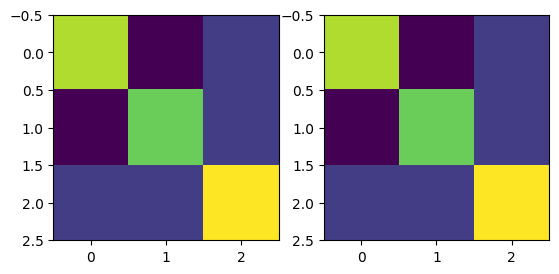

In [86]:
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.imshow(H)
ax2.imshow(H_fin)
# plt.colorbar()
H_fin

In [82]:
H

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

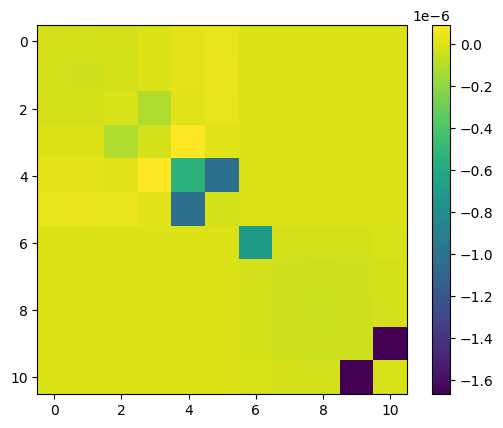

In [89]:
plt.imshow(H-H_fin)
plt.colorbar()

[750.         591.34505691 752.         807.5516477  758.
 730.66901138 909.65494309 752.         701.4483523  758.
 794.33098862]


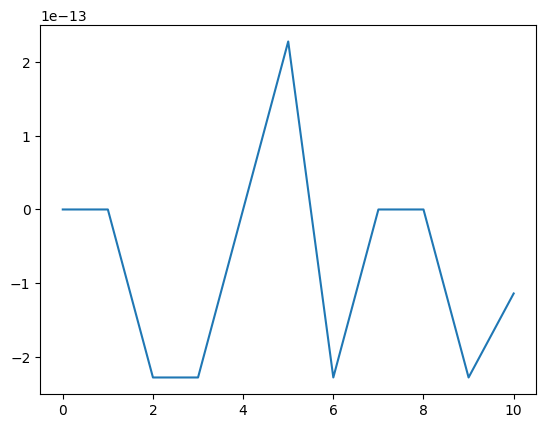

In [28]:
plt.plot((H-H_fin).diagonal())
plt.plot()
print(H.diagonal())

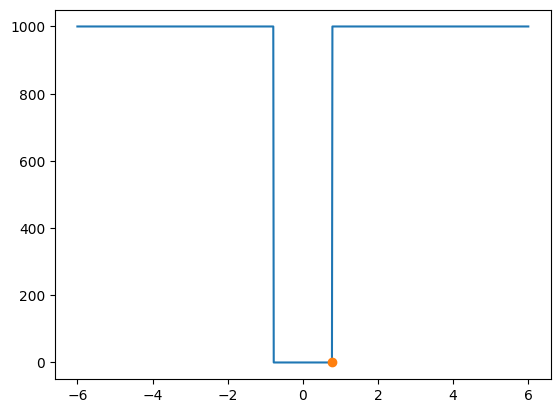

In [45]:
xx = np.linspace(-6, 6,1000)
plt.plot(xx, V(xx, V0, a))
plt.plot([np.pi/4], [0], 'o')

[[ 3.41357194]
 [29.45231515]
 [13.47572645]
 [48.14361036]]


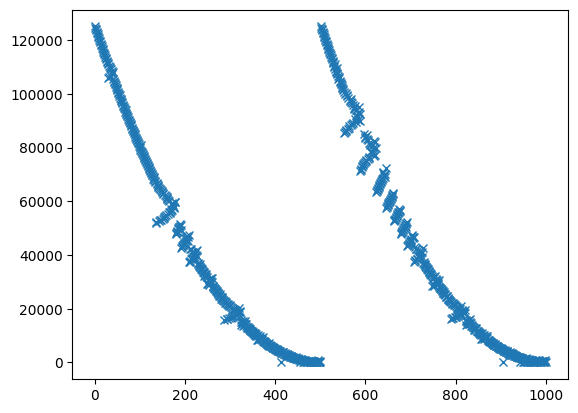

In [124]:
val, vec = np.linalg.eig(H_fin)
plt.plot(val, 'x')
# plt.ylim(0, 10)
idx = np.argwhere(val<50)
print(val[idx])
# [ 3.41357099 13.47572274 29.45230759 48.14346422]

2.58631069015999e-08


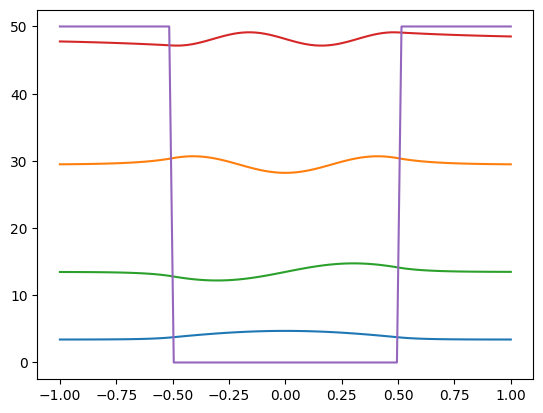

In [134]:
print(vec[idx[0], 0][0])
xxx = np.linspace(-a, a, 100)
psi = np.zeros([idx.size, xxx.size])
for i in range(N):
    for j in range(idx.size):
        psi[j] += np.array([vec[i, idx[j][0]] * basis(xi, i, N, w) for xi in xxx])
for j in range(idx.size):
    plt.plot(xxx, psi[j] + val[idx[j]])

plt.plot(xxx, V(xxx, V0, a))

      converged: True
           flag: converged
 function_calls: 14
     iterations: 13
           root: 4.5210647623057945


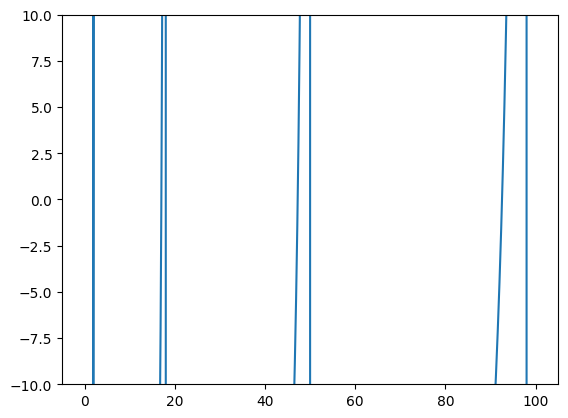

In [99]:
from scipy.optimize import root_scalar

def logbc(E, m=1, V0=1000, a=np.pi/2):
    k = np.sqrt(2*m*E)
    kappa = np.sqrt(2*m*(V0 - E))
    return k*np.tan(k*a/2) - kappa
E = np.linspace(0, 100, 10000)
plt.plot(E, logbc(E))
# res = root_scalar(logbc, bracket=[0, np.pi**2/2-1e-5])
plt.ylim(-10, 10)
# plt.plot([np.pi**2/2], [0], '-o')
print(res)

In [76]:
from scipy.optimize import root_scalar


def fk(E, V0=50, a=1, n=1):
    """Returns the error in the equality:
        k2 = k1 * tan(k1 * a / 2) for odd n (even parity solutions); or
       -k2 = k1 * cot(k1 * a / 2) for even n (odd parity solutions),
        where k1 = sqrt(2 * E) and k2 = sqrt(2 * (V0 - E)) for E < V0.
    """
    k1 = np.sqrt(2 * E)
    k2 = np.sqrt(2 * (V0 - E))
    if n % 2:
        return k2 - k1 * np.tan(k1 * a / 2)
    else:
        return k2 + k1 / np.tan(k1 * a / 2)


def Eanalytic(V0=50, a=1, pts=100):
    """Finds the roots of the fk between 0 and V0 for odd and even n."""
    Ei = np.linspace(0.0, V0, pts)
    roots = []
    for n in [1, 2]:
        for i in range(pts - 1):
            soln = root_scalar(fk, args=(V0, a, n), x0=Ei[i], x1=Ei[i + 1])
            if soln.converged and np.around(soln.root, 9) not in roots:
                roots.append(np.around(soln.root, 9))
    return np.sort(roots)


Elist = Eanalytic()
print(Elist)

[ 3.41357099 13.47572274 29.45230759 48.14346422]


/tmp/ipykernel_4354/222987559.py:10: RuntimeWarning: invalid value encountered in sqrt
  k1 = np.sqrt(2 * E)
/tmp/ipykernel_4354/222987559.py:11: RuntimeWarning: invalid value encountered in sqrt
  k2 = np.sqrt(2 * (V0 - E))
/tmp/ipykernel_4354/222987559.py:15: RuntimeWarning: invalid value encountered in scalar divide
  return k2 + k1 / np.tan(k1 * a / 2)


In [ ]:
from scipy.optimize import root_scalar

def logbc(E, m=1, V0=10, a=1):
    k = np.sqrt(2*m*E)
    kappa = np.sqrt(2*m*(V0 - E))
    return k*np.tan(k*a/2) - kappa
E = np.linspace(0, 5, 10000)
# plt.plot(E, logbc(E))
res = root_scalar(logbc, bracket=[0, np.pi**2/2-1e-5])
# plt.ylim(-100, 100)
# plt.plot([np.pi**2/2], [0], '-o')
print(res)